In [1]:
!pip install Sastrawi
!pip install nltk
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import re
import nltk
import string
import swifter
import numpy as np 
import pandas as pd
import seaborn as sns
from nltk import word_tokenize 
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from sklearn import preprocessing
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# nltk.download("stopwords")
# nltk.download('punkt')

palette=sns.color_palette('magma')
sns.set(palette=palette)

In [3]:
df = pd.read_csv("Data Fix.csv")
df.head()

,reviewId,userName,userImage,review,rating,date,replyReview,repliedAt,Source,Sentimen
0,gp:AOqpTOEnUbk_19-MO6sPHl7z9Z5Dvv2zmmd5NY5Tcm8...,Della Nis94,https://play-lh.googleusercontent.com/a/AATXAJ...,Waktu blm di upgrade ataupun udah upgrade sama...,1,5/19/2022 7:37,"Hi kak, mohon maaf atas ketidaknyamanannya. Mo...",5/20/2022 16:50,Google Play Store,Negative
1,gp:AOqpTOE-i_4JaevUcEqVHqOGXjj_JLsRO35lZeEgJU4...,Jakarta Review,https://play-lh.googleusercontent.com/a-/AOh14...,Kirim kode verifikasi email gak masuk2 sampe s...,1,4/20/2022 10:01,"Hi kak, mohon maaf atas ketidaknyamanannya. Mo...",4/20/2022 14:37,Google Play Store,Negative
2,gp:AOqpTOEpoOwOrsQPdu95u3g2IOcGGWUuurm70hWbqXs...,Shasha Rose,https://play-lh.googleusercontent.com/a-/AOh14...,saya minta verifikasi sampe 3 kali gagal. teru...,2,4/7/2022 5:04,"Hi kak, mohon maaf atas ketidaknyamanannya. Mo...",4/7/2022 15:34,Google Play Store,Negative
3,gp:AOqpTOGVbFw4LlhptIBTpsK1oThh1a_AwdKaxfaSvQX...,Kris Panji Mukti,https://play-lh.googleusercontent.com/a/AATXAJ...,Tolong perbaiki masalah untuk pendaftaran vaks...,3,4/4/2022 22:29,"Hi kak, mohon maaf atas ketidaknyamanannya. Mo...",4/5/2022 10:51,Google Play Store,Negative
4,gp:AOqpTOH7dBxQ2t4OLHM5M0pP4h-_vbwOX5xPK-SA2Lu...,Dwi Wiharti,https://play-lh.googleusercontent.com/a/AATXAJ...,Saya sudah daftar untuk vaksin booster moderna...,1,5/14/2022 7:28,"Hi kak, mohon maaf atas ketidaknyamanannya. Mo...",5/18/2022 13:47,Google Play Store,Negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   reviewId     1857 non-null   object
 1   userName     1980 non-null   object
 2   userImage    1857 non-null   object
 3   review       1980 non-null   object
 4   rating       1980 non-null   int64 
 5   date         1980 non-null   object
 6   replyReview  1744 non-null   object
 7   repliedAt    1631 non-null   object
 8   Source       1980 non-null   object
 9   Sentimen     1980 non-null   object
dtypes: int64(1), object(9)
memory usage: 154.8+ KB


In [5]:
dateYear = pd.DatetimeIndex(df['date']).year

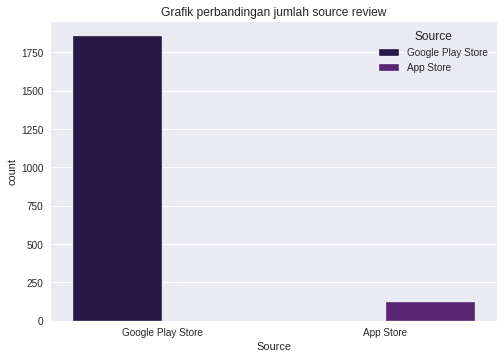

<Figure size 720x720 with 0 Axes>

In [6]:
# Visualisasi perbandingan jumlah source review

plt.style.use("seaborn")
plt.title("Grafik perbandingan jumlah source review")
sns.countplot(x="Source", hue="Source", data=df, palette=palette)
plt.figure(figsize=(10, 10))
plt.show()

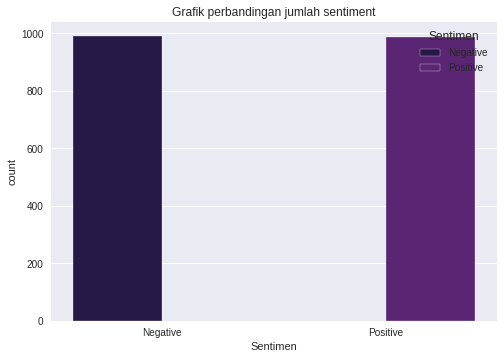

<Figure size 720x720 with 0 Axes>

In [7]:
# Visualisasi perbandingan jumlah sentiment

plt.style.use("seaborn")
plt.title("Grafik perbandingan jumlah sentiment")
sns.countplot(x="Sentimen", hue="Sentimen", data=df, palette=palette)
plt.figure(figsize=(10, 10))
plt.show()

# Data Preparation

In [8]:
# Menghapus kolom yang tidak akan digunakan

df.drop(["reviewId"], axis=1, inplace=True)
df.drop(["userImage"], axis=1, inplace=True)
df.drop(["rating"], axis=1, inplace=True)
df.drop(["date"], axis=1, inplace=True)
df.drop(["replyReview"], axis=1, inplace=True)
df.drop(["repliedAt"], axis=1, inplace=True)
df.drop(["Source"], axis=1, inplace=True)

df.head()

,userName,review,Sentimen
0,Della Nis94,Waktu blm di upgrade ataupun udah upgrade sama...,Negative
1,Jakarta Review,Kirim kode verifikasi email gak masuk2 sampe s...,Negative
2,Shasha Rose,saya minta verifikasi sampe 3 kali gagal. teru...,Negative
3,Kris Panji Mukti,Tolong perbaiki masalah untuk pendaftaran vaks...,Negative
4,Dwi Wiharti,Saya sudah daftar untuk vaksin booster moderna...,Negative


In [9]:
# Konversi data kategorik menjadi data numerik

label_encoder = preprocessing.LabelEncoder()
df['Sentimen']= label_encoder.fit_transform(df['Sentimen']) 

In [10]:
df.head(100)

,userName,review,Sentimen
0,Della Nis94,Waktu blm di upgrade ataupun udah upgrade sama...,0
1,Jakarta Review,Kirim kode verifikasi email gak masuk2 sampe s...,0
2,Shasha Rose,saya minta verifikasi sampe 3 kali gagal. teru...,0
3,Kris Panji Mukti,Tolong perbaiki masalah untuk pendaftaran vaks...,0
4,Dwi Wiharti,Saya sudah daftar untuk vaksin booster moderna...,0
...,...,...,...
95,Prescilia I Polii,Sangat tidak membantu dan tidak menjawab keluh...,0
96,Isa Muhamad,"Hai JAKI, saya lihat di aplikasi JAKI ada fitu...",1
97,Ibnu Rohman,Asli ini aplikasi lengkap banget... Kita bisa ...,1
98,Salsabila Tri Mutia,Saya download ini untukdaftar vaksin pertama d...,0


# Data preprocessing

In [11]:
# 1. Case Folding -> Mengubah text menjadi format yang sama
df["review"] = df["review"].str.lower()
df.head()

,userName,review,Sentimen
0,Della Nis94,waktu blm di upgrade ataupun udah upgrade sama...,0
1,Jakarta Review,kirim kode verifikasi email gak masuk2 sampe s...,0
2,Shasha Rose,saya minta verifikasi sampe 3 kali gagal. teru...,0
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0


In [12]:
# 2. Cleansing

def cleansing_text(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    text = text.replace("http://", " ").replace("https://", " ")
    # menghapus punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    # menghapus single char
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    # menghapus number
    text = re.sub(r"\d+", " ", text)

    return text

In [13]:
df['review'] = df['review'].apply(cleansing_text)

df

,userName,review,Sentimen
0,Della Nis94,waktu blm di upgrade ataupun udah upgrade sama...,0
1,Jakarta Review,kirim kode verifikasi email gak masuk sampe s...,0
2,Shasha Rose,saya minta verifikasi sampe kali gagal terus...,0
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0
...,...,...,...
1975,123..45..67,ga bisa download sppt pbb dibilang nik salah u...,0
1976,Suryono888,abis di update ga bisa lapor,0
1977,rirenur30,aplikasi cepat tanggap semoga pelayanan nya ma...,1
1978,Aserehehehe,jaki keren tinggal tambahin rute moda transpor...,1


In [14]:
#3. Tokenisasi 
def word_tokenize(text):
    return word_tokenize(text)

In [17]:
df['review_tokenize'] = df['review'].apply(word_tokenize)

df.head()

,userName,review,Sentimen,review_tokenize
0,Della Nis94,waktu blm di upgrade ataupun udah upgrade sama...,0,"[waktu, blm, di, upgrade, ataupun, udah, upgra..."
1,Jakarta Review,kirim kode verifikasi email gak masuk sampe s...,0,"[kirim, kode, verifikasi, email, gak, masuk, s..."
2,Shasha Rose,saya minta verifikasi sampe kali gagal terus...,0,"[saya, minta, verifikasi, sampe, kali, gagal, ..."
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0,"[tolong, perbaiki, masalah, untuk, pendaftaran..."
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0,"[saya, sudah, daftar, untuk, vaksin, booster, ..."


In [24]:
#4. Normalization
normalizad_word = pd.read_csv("colloquial-indonesian-lexicon.csv")
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [25]:
df['review_normalized'] = df['review_tokenize'].apply(normalized_term)

df

,userName,review,Sentimen,review_tokenize,review_normalized,review_stemmed
0,Della Nis94,waktu blm di upgrade ataupun udah upgrade sama...,0,"[waktu, blm, di, upgrade, ataupun, udah, upgra...","[waktu, belum, di, upgrade, ataupun, sudah, up...","[waktu, belum, di, upgrade, atau, sudah, upgra..."
1,Jakarta Review,kirim kode verifikasi email gak masuk sampe s...,0,"[kirim, kode, verifikasi, email, gak, masuk, s...","[kirim, kode, verifikasi, email, enggak, masuk...","[kirim, kode, verifikasi, email, enggak, masuk..."
2,Shasha Rose,saya minta verifikasi sampe kali gagal terus...,0,"[saya, minta, verifikasi, sampe, kali, gagal, ...","[saya, meminta, verifikasi, sampai, kali, gaga...","[saya, minta, verifikasi, sampai, kali, gagal,..."
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0,"[tolong, perbaiki, masalah, untuk, pendaftaran...","[tolong, perbaiki, masalah, untuk, pendaftaran...","[tolong, baik, masalah, untuk, daftar, vaksin,..."
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0,"[saya, sudah, daftar, untuk, vaksin, booster, ...","[saya, sudah, daftar, untuk, vaksin, booster, ...","[saya, sudah, daftar, untuk, vaksin, booster, ..."
...,...,...,...,...,...,...
1975,123..45..67,ga bisa download sppt pbb dibilang nik salah u...,0,"[ga, bisa, download, sppt, pbb, dibilang, nik,...","[enggak, bisa, download, sppt, pbb, dibilang, ...","[enggak, bisa, download, sppt, pbb, bilang, ni..."
1976,Suryono888,abis di update ga bisa lapor,0,"[abis, di, update, ga, bisa, lapor]","[habis, di, update, enggak, bisa, lapor]","[habis, di, update, enggak, bisa, lapor]"
1977,rirenur30,aplikasi cepat tanggap semoga pelayanan nya ma...,1,"[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, moga, layan, nya, m..."
1978,Aserehehehe,jaki keren tinggal tambahin rute moda transpor...,1,"[jaki, keren, tinggal, tambahin, rute, moda, t...","[jaki, keren, tinggal, tambahkan, rute, moda, ...","[jaki, keren, tinggal, tambah, rute, moda, tra..."


In [26]:
#5. Stemming
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['review_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['review_stemmed'] = df['review_normalized'].swifter.apply(get_stemmed_term)

3703
------------------------
waktu : waktu
belum : belum
di : di
upgrade : upgrade
ataupun : atau
sudah : sudah
sama : sama
ajamau : ajamau
daftar : daftar
ke : ke
antrian : antri
faskes : faskes
gangguan : ganggu
terus : terus
berharihari : berharihari
enggak : enggak
benar : benar
juga : juga
tolong : tolong
diperbaiki : baik
kerjanya : kerja
kirim : kirim
kode : kode
verifikasi : verifikasi
email : email
masuk : masuk
sampai : sampai
saat : saat
ini : ini
ada : ada
nya : nya
aplikasi : aplikasi
pemerintah : perintah
kenapa : kenapa
selalu : selalu
ampas : ampas
yang : yang
kerja : kerja
orang : orang
bawaan : bawa
sih : sih
perbaiki : baik
lah : lah
saya : saya
meminta : minta
kali : kali
gagal : gagal
padahal : padahal
nomor : nomor
ktpnama : ktpnama
dan : dan
foto : foto
sesuai : sesuai
mana : mana
sekalinya : sekali
jam : jam
hari : hari
coba : coba
setiap : tiap
mendaftarkan : daftar
langsung : langsung
no : no
ktp : ktp
nama : nama
lengkap : lengkap
capcha : capcha
not : not
v

Pandas Apply:   0%|          | 0/1980 [00:00<?, ?it/s]

In [61]:
#6. Filtering (Stop word removal) 
factory = StopWordRemoverFactory()
remove_word_dict = ['terus', 'padahal', 'apa', 'saya', 'aku', 'mau', 'nya', 'saja', 'bagaimana', 'malah', 'kasih', 'pas', 'kok', 'sih', 'layan', 'lurah', 'lah', 'kan', 'doang']

stopwords = np.append(remove_word_dict, factory.get_stop_words())
print(stopwords)

['terus' 'padahal' 'apa' 'saya' 'aku' 'mau' 'nya' 'saja' 'bagaimana'
 'malah' 'kasih' 'pas' 'kok' 'sih' 'layan' 'lurah' 'lah' 'kan' 'doang'
 'yang' 'untuk' 'pada' 'ke' 'para' 'namun' 'menurut' 'antara' 'dia' 'dua'
 'ia' 'seperti' 'jika' 'jika' 'sehingga' 'kembali' 'dan' 'tidak' 'ini'
 'karena' 'kepada' 'oleh' 'saat' 'harus' 'sementara' 'setelah' 'belum'
 'kami' 'sekitar' 'bagi' 'serta' 'di' 'dari' 'telah' 'sebagai' 'masih'
 'hal' 'ketika' 'adalah' 'itu' 'dalam' 'bisa' 'bahwa' 'atau' 'hanya'
 'kita' 'dengan' 'akan' 'juga' 'ada' 'mereka' 'sudah' 'saya' 'terhadap'
 'secara' 'agar' 'lain' 'anda' 'begitu' 'mengapa' 'kenapa' 'yaitu' 'yakni'
 'daripada' 'itulah' 'lagi' 'maka' 'tentang' 'demi' 'dimana' 'kemana'
 'pula' 'sambil' 'sebelum' 'sesudah' 'supaya' 'guna' 'kah' 'pun' 'sampai'
 'sedangkan' 'selagi' 'sementara' 'tetapi' 'apakah' 'kecuali' 'sebab'
 'selain' 'seolah' 'seraya' 'seterusnya' 'tanpa' 'agak' 'boleh' 'dapat'
 'dsb' 'dst' 'dll' 'dahulu' 'dulunya' 'anu' 'demikian' 'tapi' 'ingin'
 

In [62]:
def stopwords_removal(text):
    return [word for word in text if word not in stopwords]

df["review_stopwords"] = df["review_stemmed"].apply(stopwords_removal)
df

,userName,review,Sentimen,review_tokenize,review_normalized,review_stemmed,review_stopwords,review_clean
0,Della Nis94,waktu blm di upgrade ataupun udah upgrade sama...,0,"[waktu, blm, di, upgrade, ataupun, udah, upgra...","[waktu, belum, di, upgrade, ataupun, sudah, up...","[waktu, belum, di, upgrade, atau, sudah, upgra...","[waktu, upgrade, upgrade, sama, ajamau, daftar...",waktu upgrade upgrade sama ajamau daftar antri...
1,Jakarta Review,kirim kode verifikasi email gak masuk sampe s...,0,"[kirim, kode, verifikasi, email, gak, masuk, s...","[kirim, kode, verifikasi, email, enggak, masuk...","[kirim, kode, verifikasi, email, enggak, masuk...","[kirim, kode, verifikasi, email, enggak, masuk...",kirim kode verifikasi email enggak masuk engga...
2,Shasha Rose,saya minta verifikasi sampe kali gagal terus...,0,"[saya, minta, verifikasi, sampe, kali, gagal, ...","[saya, meminta, verifikasi, sampai, kali, gaga...","[saya, minta, verifikasi, sampai, kali, gagal,...","[minta, verifikasi, kali, gagal, nomor, ktpnam...",minta verifikasi kali gagal terus padahal nomo...
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0,"[tolong, perbaiki, masalah, untuk, pendaftaran...","[tolong, perbaiki, masalah, untuk, pendaftaran...","[tolong, baik, masalah, untuk, daftar, vaksin,...","[baik, masalah, daftar, vaksin, nomor, ktp, na...",baik masalah daftar vaksin nomor ktp nama sesu...
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0,"[saya, sudah, daftar, untuk, vaksin, booster, ...","[saya, sudah, daftar, untuk, vaksin, booster, ...","[saya, sudah, daftar, untuk, vaksin, booster, ...","[daftar, vaksin, booster, moderna, lalu, aplik...",daftar vaksin booster moderna lalu aplikasi ja...
...,...,...,...,...,...,...,...,...
1975,123..45..67,ga bisa download sppt pbb dibilang nik salah u...,0,"[ga, bisa, download, sppt, pbb, dibilang, nik,...","[enggak, bisa, download, sppt, pbb, dibilang, ...","[enggak, bisa, download, sppt, pbb, bilang, ni...","[enggak, download, sppt, pbb, bilang, nik, sal...",enggak download sppt pbb bilang nik salah cek ...
1976,Suryono888,abis di update ga bisa lapor,0,"[abis, di, update, ga, bisa, lapor]","[habis, di, update, enggak, bisa, lapor]","[habis, di, update, enggak, bisa, lapor]","[habis, update, enggak, lapor]",habis update enggak lapor
1977,rirenur30,aplikasi cepat tanggap semoga pelayanan nya ma...,1,"[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, moga, layan, nya, m...","[aplikasi, cepat, tanggap, moga, makin, tingkat]",aplikasi cepat tanggap moga makin tingkat
1978,Aserehehehe,jaki keren tinggal tambahin rute moda transpor...,1,"[jaki, keren, tinggal, tambahin, rute, moda, t...","[jaki, keren, tinggal, tambahkan, rute, moda, ...","[jaki, keren, tinggal, tambah, rute, moda, tra...","[jaki, keren, tinggal, tambah, rute, moda, tra...",jaki keren tinggal tambah rute moda transporta...


# Data final

In [63]:
df["review_clean"] = [' '.join(map(str, l)) for l in df['review_stopwords']]

In [64]:
df

,userName,review,Sentimen,review_tokenize,review_normalized,review_stemmed,review_stopwords,review_clean
0,Della Nis94,waktu blm di upgrade ataupun udah upgrade sama...,0,"[waktu, blm, di, upgrade, ataupun, udah, upgra...","[waktu, belum, di, upgrade, ataupun, sudah, up...","[waktu, belum, di, upgrade, atau, sudah, upgra...","[waktu, upgrade, upgrade, sama, ajamau, daftar...",waktu upgrade upgrade sama ajamau daftar antri...
1,Jakarta Review,kirim kode verifikasi email gak masuk sampe s...,0,"[kirim, kode, verifikasi, email, gak, masuk, s...","[kirim, kode, verifikasi, email, enggak, masuk...","[kirim, kode, verifikasi, email, enggak, masuk...","[kirim, kode, verifikasi, email, enggak, masuk...",kirim kode verifikasi email enggak masuk engga...
2,Shasha Rose,saya minta verifikasi sampe kali gagal terus...,0,"[saya, minta, verifikasi, sampe, kali, gagal, ...","[saya, meminta, verifikasi, sampai, kali, gaga...","[saya, minta, verifikasi, sampai, kali, gagal,...","[minta, verifikasi, kali, gagal, nomor, ktpnam...",minta verifikasi kali gagal nomor ktpnama foto...
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0,"[tolong, perbaiki, masalah, untuk, pendaftaran...","[tolong, perbaiki, masalah, untuk, pendaftaran...","[tolong, baik, masalah, untuk, daftar, vaksin,...","[baik, masalah, daftar, vaksin, nomor, ktp, na...",baik masalah daftar vaksin nomor ktp nama sesu...
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0,"[saya, sudah, daftar, untuk, vaksin, booster, ...","[saya, sudah, daftar, untuk, vaksin, booster, ...","[saya, sudah, daftar, untuk, vaksin, booster, ...","[daftar, vaksin, booster, moderna, lalu, aplik...",daftar vaksin booster moderna lalu aplikasi ja...
...,...,...,...,...,...,...,...,...
1975,123..45..67,ga bisa download sppt pbb dibilang nik salah u...,0,"[ga, bisa, download, sppt, pbb, dibilang, nik,...","[enggak, bisa, download, sppt, pbb, dibilang, ...","[enggak, bisa, download, sppt, pbb, bilang, ni...","[enggak, download, sppt, pbb, bilang, nik, sal...",enggak download sppt pbb bilang nik salah cek ...
1976,Suryono888,abis di update ga bisa lapor,0,"[abis, di, update, ga, bisa, lapor]","[habis, di, update, enggak, bisa, lapor]","[habis, di, update, enggak, bisa, lapor]","[habis, update, enggak, lapor]",habis update enggak lapor
1977,rirenur30,aplikasi cepat tanggap semoga pelayanan nya ma...,1,"[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, moga, layan, nya, m...","[aplikasi, cepat, tanggap, moga, makin, tingkat]",aplikasi cepat tanggap moga makin tingkat
1978,Aserehehehe,jaki keren tinggal tambahin rute moda transpor...,1,"[jaki, keren, tinggal, tambahin, rute, moda, t...","[jaki, keren, tinggal, tambahkan, rute, moda, ...","[jaki, keren, tinggal, tambah, rute, moda, tra...","[jaki, keren, tinggal, tambah, rute, moda, tra...",jaki keren tinggal tambah rute moda transporta...


In [65]:
df.to_excel("data_clean.xlsx")

# Word Distribution

In [66]:
review = ' '.join(str(v) for v in df['review_clean'])

In [67]:
tokenize_review = word_tokenize(review)

In [68]:
tokenize_review

['waktu',
 'upgrade',
 'upgrade',
 'sama',
 'ajamau',
 'daftar',
 'antri',
 'faskes',
 'ganggu',
 'berharihari',
 'enggak',
 'benar',
 'baik',
 'kerja',
 'kirim',
 'kode',
 'verifikasi',
 'email',
 'enggak',
 'masuk',
 'enggak',
 'email',
 'aplikasi',
 'perintah',
 'selalu',
 'ampas',
 'kerja',
 'orang',
 'bawa',
 'baik',
 'minta',
 'verifikasi',
 'kali',
 'gagal',
 'nomor',
 'ktpnama',
 'foto',
 'sesuai',
 'mana',
 'verifikasi',
 'sekali',
 'kali',
 'jam',
 'hari',
 'coba',
 'tiap',
 'daftar',
 'langsung',
 'no',
 'ktp',
 'nama',
 'lengkap',
 'selalu',
 'capcha',
 'not',
 'valid',
 'aplikasi',
 'sering',
 'error',
 'baik',
 'masalah',
 'daftar',
 'vaksin',
 'nomor',
 'ktp',
 'nama',
 'sesuai',
 'enggak',
 'bisa',
 'daftar',
 'terang',
 'nama',
 'ktp',
 'sesuaidaftar',
 'vaksin',
 'masalah',
 'jadi',
 'masalah',
 'ket',
 'atas',
 'daftar',
 'vaksin',
 'booster',
 'moderna',
 'lalu',
 'aplikasi',
 'jaki',
 'datang',
 'sesuai',
 'jadwal',
 'tetap',
 'datang',
 'vaksin',
 'jadi',
 'daftar

In [69]:
fqdist = FreqDist(tokenize_review)

In [70]:
fqdist

FreqDist({'waktu': 53,
          'upgrade': 4,
          'sama': 109,
          'ajamau': 1,
          'daftar': 586,
          'antri': 47,
          'faskes': 45,
          'ganggu': 10,
          'berharihari': 1,
          'enggak': 689,
          'benar': 57,
          'baik': 140,
          'kerja': 43,
          'kirim': 20,
          'kode': 10,
          'verifikasi': 25,
          'email': 60,
          'masuk': 106,
          'aplikasi': 701,
          'perintah': 26,
          'selalu': 119,
          'ampas': 3,
          'orang': 58,
          'bawa': 11,
          'minta': 27,
          'kali': 74,
          'gagal': 18,
          'nomor': 20,
          'ktpnama': 1,
          'foto': 19,
          'sesuai': 60,
          'mana': 44,
          'sekali': 86,
          'jam': 72,
          'hari': 68,
          'coba': 71,
          'tiap': 43,
          'langsung': 57,
          'no': 16,
          'ktp': 38,
          'nama': 55,
          'lengkap': 23,
          'capch

In [71]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(200)

[('vaksin', 790),
 ('aplikasi', 701),
 ('enggak', 689),
 ('daftar', 586),
 ('jaki', 348),
 ('sangat', 232),
 ('bantu', 223),
 ('bagus', 192),
 ('kuota', 183),
 ('buat', 180),
 ('penuh', 159),
 ('banget', 153),
 ('baik', 140),
 ('lokasi', 140),
 ('jakarta', 138),
 ('jadi', 124),
 ('lapor', 123),
 ('selalu', 119),
 ('semua', 118),
 ('jadwal', 114),
 ('mantap', 112),
 ('sama', 109),
 ('masuk', 106),
 ('mudah', 104),
 ('susah', 102),
 ('data', 98),
 ('good', 90),
 ('jelas', 90),
 ('vaksinasi', 87),
 ('sekali', 86),
 ('banyak', 85),
 ('tanggal', 79),
 ('kalo', 78),
 ('pilih', 77),
 ('dki', 77),
 ('kali', 74),
 ('cek', 74),
 ('terima', 73),
 ('tempat', 73),
 ('jam', 72),
 ('datang', 72),
 ('pakai', 72),
 ('cepat', 72),
 ('coba', 71),
 ('sedia', 70),
 ('hari', 68),
 ('sulit', 68),
 ('bikin', 68),
 ('suruh', 64),
 ('lebih', 64),
 ('nik', 63),
 ('download', 62),
 ('keren', 62),
 ('email', 60),
 ('sesuai', 60),
 ('dong', 60),
 ('lewat', 59),
 ('orang', 58),
 ('warga', 58),
 ('ulang', 58),
 ('ben

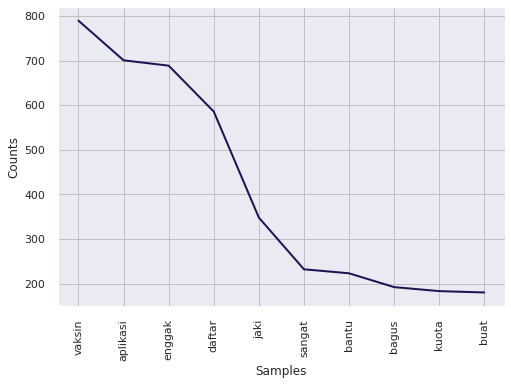

In [72]:
# plotting
fqdist.plot(10,cumulative=False)
plt.show()